In [1]:
pip install PyPDF2 pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import PyPDF2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import re
from collections import Counter
import requests
from io import BytesIO

In [3]:
word_df = pd.read_excel(r"C:\Users\rohit\Desktop\Rohit\FSR project\sentiment.xlsx")
positive_words = set(word_df['Positive words'].dropna().str.lower().tolist())
negative_words = set(word_df['Negative words'].dropna().str.lower().tolist())
word_df.head()

,Positive words,Negative words
0,able,abnormally
1,absorb,abrupt
2,absorbed,abundant
3,absorbing,adverse
4,acceptable,adversely


In [4]:
def extract_text_from_pdf(pdf_link):
    response = requests.get(pdf_link)
    pdf_file = BytesIO(response.content)
    pdf_reader = PyPDF2.PdfReader(pdf_file)
    text = ''
    for page in pdf_reader.pages:
        text += page.extract_text()
    return text


def sentiment_analysis(text):
    words = re.findall(r'\b\w+\b', text.lower())
    total_words = len(words)
    word_counts = Counter(words)
    positive_count = sum(word_counts[word] for word in positive_words if word in word_counts)
    negative_count = sum(word_counts[word] for word in negative_words if word in word_counts)

    sentiment_index = (negative_count - positive_count) / total_words if total_words > 0 else 0
    
    return positive_count, negative_count, total_words, sentiment_index


In [5]:
pdf_links = ["https://rbidocs.rbi.org.in/rdocs//PublicationReport/Pdfs/0FSRJUN2024_270620242B95CB128D1847A3ACAB5B5A4BEBF0DF.PDF",
             "https://rbidocs.rbi.org.in/rdocs//PublicationReport/Pdfs/0FSRDECB815B9437D6D428F81D45C22BBF6C62A.PDF",
             "https://rbidocs.rbi.org.in/rdocs//PublicationReport/Pdfs/0FSRJUNE20231159B36F45EA406E9D704BBC8F73D785.PDF",
             "https://rbidocs.rbi.org.in/rdocs/PublicationReport/Pdfs/0FSRDECEMBER2022F93A2F188A394ACDB2FDDC2FCC0D07F0.PDF",
             "https://rbidocs.rbi.org.in/rdocs//PublicationReport/Pdfs/0FSRJUNE2022F758BFB27A9145A385FE9AC8D204AC82.PDF",
             "https://rbidocs.rbi.org.in/rdocs/PublicationReport/Pdfs/FSRDEC2021_FULL2D99E6548CD0478CA90EE717F2B85D45.PDF",
             "https://rbidocs.rbi.org.in/rdocs/PublicationReport/Pdfs/FSRJULY20210595CD3BEDFA466EBE9169BCE426E32C.PDF",
             "https://rbidocs.rbi.org.in/rdocs//PublicationReport/Pdfs/FSR_F06B552BF8B144B80B4AEFEDEB3D62218.PDF",
             "https://rbidocs.rbi.org.in/rdocs/PublicationReport/Pdfs/0FSRJULY2020C084CED43CD1447D80B4789F7E49E499.PDF",
             "https://rbidocs.rbi.org.in/rdocs/PublicationReport/Pdfs/0FSRDECEMBER20198C840246658946159CB3B94E8516F2EC.PDF",
             "https://rbidocs.rbi.org.in/rdocs/PublicationReport/Pdfs/FSRJUNE2019E5ECDDAD7E514756AFEF1E71CB2ADA2B.PDF",
             "https://rbidocs.rbi.org.in/rdocs/PublicationReport/Pdfs/0FSRDECEMBER2018DAFEDD89C01C432786925639A4864F96.PDF",
             "https://rbidocs.rbi.org.in/rdocs/PublicationReport/Pdfs/0FSR_JUNE2018A3526EF7DC8640539C1420D256A470FC.PDF",
             "https://rbidocs.rbi.org.in/rdocs//PublicationReport/Pdfs/0FSR201730210986ADDA44E2A946A3F6C4408581.PDF",
             "https://rbidocs.rbi.org.in/rdocs/PublicationReport/Pdfs/0FSR_30061794092D8D036447928A4B45880863B33E.PDF",
             "https://rbidocs.rbi.org.in/rdocs/PublicationReport/Pdfs/0FSR_166BABD6ABE04B48AFB534749A1BF38882.PDF",
             "https://rbidocs.rbi.org.in/rdocs/PublicationReport/Pdfs/0FSR2316BB76DB39BF964542B9D1EBE2CBC273E7.PDF",
             "https://rbidocs.rbi.org.in/rdocs/PublicationReport/Pdfs/0FSR6F7E7BC6C14F42E99568A80D9FF7BBA6.PDF",
             "https://rbidocs.rbi.org.in/rdocs//PublicationReport/Pdfs/0FS15A56030B88BD047B4A7124BA5AF1D8CF2.PDF",
             "https://rbidocs.rbi.org.in/rdocs//PublicationReport/Pdfs/FSR29122014_FL.PDF",
             "https://rbidocs.rbi.org.in/rdocs/PublicationReport/Pdfs/0FSR26062014F.pdf",
             "https://rbidocs.rbi.org.in/rdocs/PublicationReport/Pdfs/0FSR26062014F.pdf",
             "https://rbidocs.rbi.org.in/rdocs//PublicationReport/Pdfs/FSRDEC301213_FL.pdf",
             "https://rbidocs.rbi.org.in/rdocs//PublicationReport/Pdfs/FSPI260613FL.pdf",
             "https://rbidocs.rbi.org.in/rdocs/PublicationReport/Pdfs/FFSR261212_FL.pdf",
             "https://rbidocs.rbi.org.in/rdocs//PublicationReport/Pdfs/FFSR260612_FL.pdf",
             "https://rbidocs.rbi.org.in/rdocs//PublicationReport/Pdfs/FSRD22122011_F.pdf",
             "https://rbidocs.rbi.org.in/rdocs/PublicationReport/Pdfs/FSR140611FL.pdf",
             "https://rbidocs.rbi.org.in/rdocs//PublicationReport/Pdfs/FSR301210F.pdf",
             "https://rbidocs.rbi.org.in/rdocs/PublicationReport/Pdfs/IFSR250310F.pdf",
            ]
len(pdf_links)

30

In [6]:
data = []
for link in pdf_links:
    text = extract_text_from_pdf(link)
    match = re.search(r'(\bJanuary|\bFebruary|\bMarch|\bApril|\bMay|\bJune|\bJuly|\bAugust|\bSeptember|\bOctober|\bNovember|\bDecember)\s+\d{4}', text, re.IGNORECASE)
    date = match.group(0) if match else 'Unknown'
    positive_count, negative_count, total_words, sentiment_index = sentiment_analysis(text)
    data.append([date, positive_count, negative_count, total_words, sentiment_index])
    
output_df = pd.DataFrame(data, columns=['Date', 'Total Positive Words', 'Total Negative Words', 'Total Words', 'Sentiment Index'])
output_df.to_csv(r"C:\Users\rohit\Desktop\Rohit\FSR project\sentiment_analysis_results.csv", index=False)

print("Sentiment analysis completed and saved to 'sentiment_analysis_results.csv'.")

Sentiment analysis completed and saved to 'sentiment_analysis_results.csv'.


In [7]:
sentiment_df = pd.read_csv("sentiment_analysis_results.csv")
sentiment_df
sentiment_df.sort_values(by="Date", inplace=True)
sentiment_df

,Date,Total Positive Words,Total Negative Words,Total Words,Sentiment Index
28,December 2010,354,578,57211,0.003915
26,December 2011,152,516,46490,0.007830
24,December 2012,162,485,40121,0.008051
22,December 2013,132,430,37359,0.007977
19,December 2014,123,265,35562,0.003993
17,December 2015,100,401,40119,0.007503
15,December 2016,120,295,34599,0.005058
13,December 2017,147,318,36129,0.004733
11,December 2018,161,373,42715,0.004963
9,December 2019,119,410,44863,0.006486


In [8]:
sentiment_df.describe()

,Total Positive Words,Total Negative Words,Total Words,Sentiment Index
count,30.000000,30.000000,30.000000,30.000000
mean,181.366667,433.900000,45777.866667,0.005597
std,67.970320,102.588683,9451.464585,0.001408
min,100.000000,265.000000,34599.000000,0.003694
25%,131.250000,357.500000,37713.000000,0.004635
50%,149.500000,440.500000,43405.000000,0.005363
75%,225.750000,494.250000,51789.250000,0.006318
max,354.000000,672.000000,66473.000000,0.008530


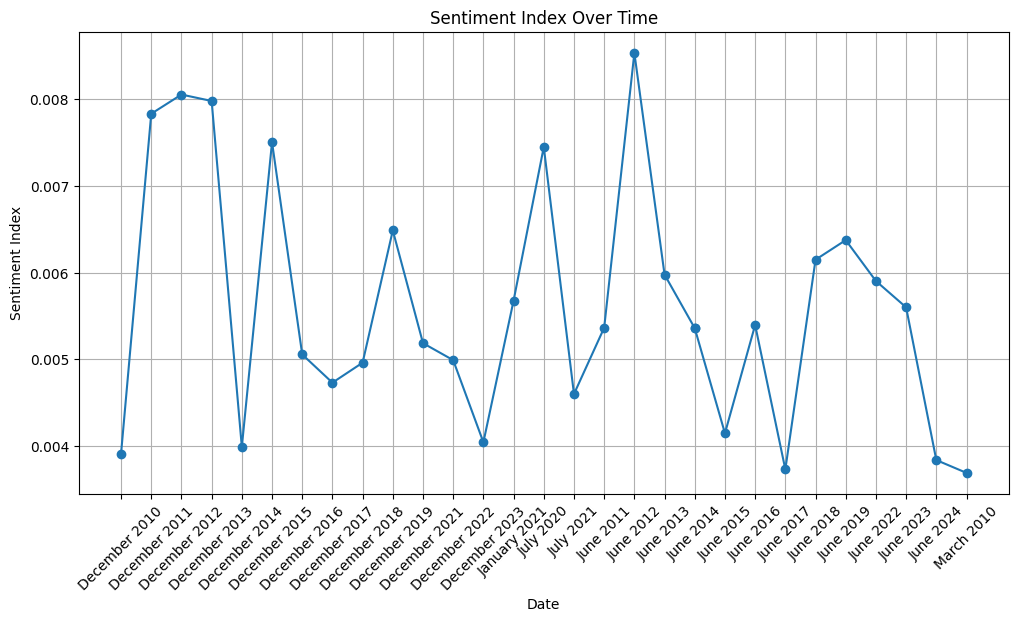

In [9]:
plt.figure(figsize=(12,6))
plt.plot(sentiment_df["Date"], sentiment_df["Sentiment Index"], marker='o')
plt.xticks(rotation=45)
plt.title("Sentiment Index Over Time")
plt.xlabel("Date")
plt.ylabel("Sentiment Index")
plt.grid(True)
plt.show()


In [10]:
macro_df = pd.read_csv(r"C:\Users\rohit\Desktop\Rohit\FSR project\macro_indicators.csv")
macro_df

,Macro_Date,GDP,NPA,Credit Growth,Deposit Growth
0,10-Jan,7.97,2.39,14.60,15.80
1,10-Sep,8.59,2.58,14.86,16.49
2,11-Mar,5.20,2.40,22.60,35.00
3,11-Sep,5.21,2.80,19.20,33.00
4,12-Mar,5.30,2.90,16.90,13.70
5,12-Sep,5.38,3.60,15.80,14.30
6,13-Mar,6.45,3.40,15.10,14.40
7,13-Sep,6.53,5.50,17.10,13.90
8,14-Mar,8.02,4.10,13.60,14.40
9,14-Sep,5.92,4.50,10.00,12.90


In [11]:
merge_df = pd.read_excel(r"C:\Users\rohit\Desktop\Rohit\FSR project\merge.xlsx")
merge_df

,Date,GDP,NPA,Credit Growth,Deposit Growth,Sentiment Index
0,2025-01-10,7.97,2.39,14.60,15.80,0.003694
1,2025-09-10,8.59,2.58,14.86,16.49,0.007830
2,2025-03-11,5.20,2.40,22.60,35.00,0.008051
3,2025-09-11,5.21,2.80,19.20,33.00,0.007977
4,2025-03-12,5.30,2.90,16.90,13.70,0.003993
5,2025-09-12,5.38,3.60,15.80,14.30,0.007503
6,2025-03-13,6.45,3.40,15.10,14.40,0.005058
7,2025-09-13,6.53,5.50,17.10,13.90,0.004733
8,2025-03-14,8.02,4.10,13.60,14.40,0.004963
9,2025-09-14,5.92,4.50,10.00,12.90,0.006486


In [12]:
mapping = {
    "Macro_Date": ["10-Jan","10-Sep","11-Mar","11-Sep","12-Mar","12-Sep","13-Mar","13-Sep","14-Mar","14-Sep",
                   "15-Mar","15-Sep","16-Mar","16-Sep","17-Mar","17-Sep","18-Mar","18-Sep","19-Mar","19-Sep",
                   "20-Mar","20-Sep","21-Mar","21-Sep","22-Mar","22-Sep","23-Mar","23-Sep","24-Mar"],
    "FSR_Date": ["Mar-10","Dec-10","Jun-11","Dec-11","Jun-12","Dec-12","Jun-13","Dec-13","Jun-14","Dec-14",
                 "Jun-15","Dec-15","Jun-16","Dec-16","Jun-17","Dec-17","Jun-18","Dec-18","Jun-19","Dec-19",
                 "Jun-20","Jan-21","Jul-21","Dec-21","Jun-22","Dec-22","Jun-23","Dec-23","Jun-24"]
}

df_map = pd.DataFrame(mapping)

In [13]:
df_map["Macro_Date_dt"] = pd.to_datetime(df_map["Macro_Date"], format="%y-%b", errors="coerce")
df_map["FSR_Date_dt"] = pd.to_datetime(df_map["FSR_Date"], format="%b-%y", errors="coerce")

df_map["FSR+Macro_Date"] = (
    df_map["Macro_Date_dt"].dt.strftime("%b") + "–" +
    df_map["FSR_Date_dt"].dt.strftime("%b %Y")
)

df_final = df_map.merge(
    macro_df,
    on="Macro_Date",
    how="left"
)

df_final["Sentiment Index"] = sentiment_df["Sentiment Index"].values[:len(df_final)]

df_final = df_final[[
    "Macro_Date", "FSR_Date", "FSR+Macro_Date",
    "GDP", "NPA", "Credit Growth", "Deposit Growth",
    "Sentiment Index"
]]

print(df_final)

   Macro_Date FSR_Date FSR+Macro_Date    GDP    NPA  Credit Growth  \
0      10-Jan   Mar-10   Jan–Mar 2010   7.97   2.39          14.60   
1      10-Sep   Dec-10   Sep–Dec 2010   8.59   2.58          14.86   
2      11-Mar   Jun-11   Mar–Jun 2011   5.20   2.40          22.60   
3      11-Sep   Dec-11   Sep–Dec 2011   5.21   2.80          19.20   
4      12-Mar   Jun-12   Mar–Jun 2012   5.30   2.90          16.90   
5      12-Sep   Dec-12   Sep–Dec 2012   5.38   3.60          15.80   
6      13-Mar   Jun-13   Mar–Jun 2013   6.45   3.40          15.10   
7      13-Sep   Dec-13   Sep–Dec 2013   6.53   5.50          17.10   
8      14-Mar   Jun-14   Mar–Jun 2014   8.02   4.10          13.60   
9      14-Sep   Dec-14   Sep–Dec 2014   5.92   4.50          10.00   
10     15-Mar   Jun-15   Mar–Jun 2015   7.59   4.60          10.00   
11     15-Sep   Dec-15   Sep–Dec 2015   7.20   5.10           9.70   
12     16-Mar   Jun-16   Mar–Jun 2016   8.68   7.60           8.80   
13     16-Sep   Dec-

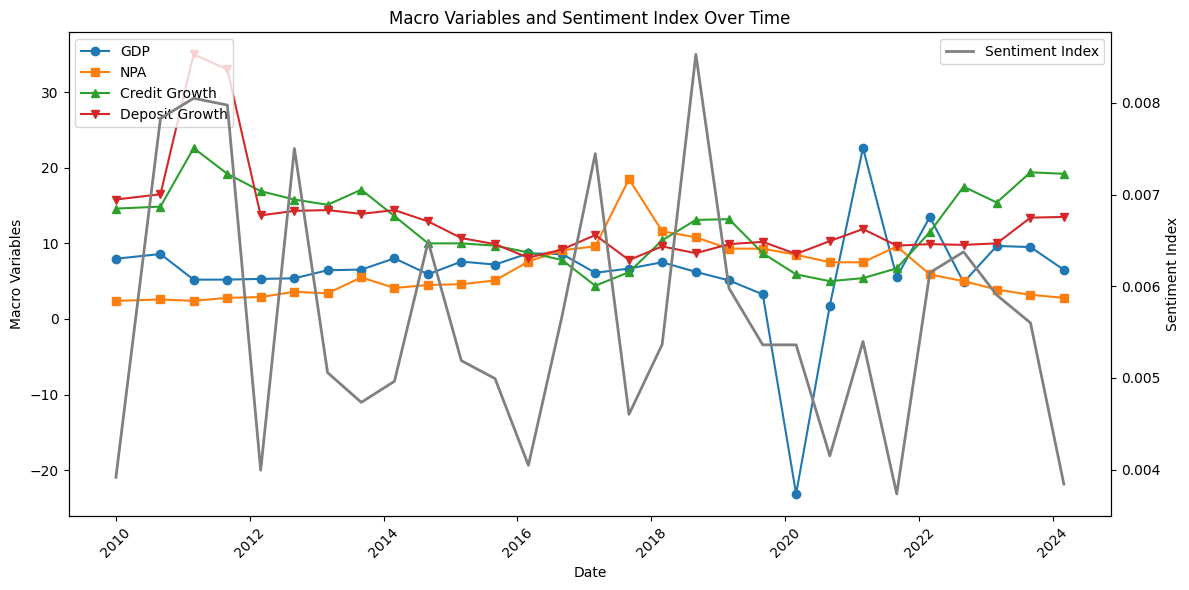

In [14]:
df_final["Macro_Date_dt"] = pd.to_datetime(df_final["Macro_Date"], format="%y-%b", errors="coerce")
plt.figure(figsize=(12, 6))

plt.plot(df_final["Macro_Date_dt"], df_final["GDP"], label="GDP", marker='o')
plt.plot(df_final["Macro_Date_dt"], df_final["NPA"], label="NPA", marker='s')
plt.plot(df_final["Macro_Date_dt"], df_final["Credit Growth"], label="Credit Growth", marker='^')
plt.plot(df_final["Macro_Date_dt"], df_final["Deposit Growth"], label="Deposit Growth", marker='v')

plt.ylabel("Macro Variables")
plt.xlabel("Date")
plt.title("Macro Variables and Sentiment Index Over Time")
plt.xticks(rotation=45)
plt.legend(loc="upper left")

plt.twinx()
plt.plot(df_final["Macro_Date_dt"], df_final["Sentiment Index"], color="grey", label="Sentiment Index", linewidth=2)
plt.ylabel("Sentiment Index")
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()


In [15]:
sentiment_corr = df_final[[
    "GDP", "NPA", "Credit Growth", "Deposit Growth"
]].corrwith(df_final["Sentiment Index"])

print("Correlation of Sentiment Index with Macro Variables:")
print(sentiment_corr)

Correlation of Sentiment Index with Macro Variables:
GDP               0.018522
NPA              -0.110487
Credit Growth     0.274719
Deposit Growth    0.443223
dtype: float64


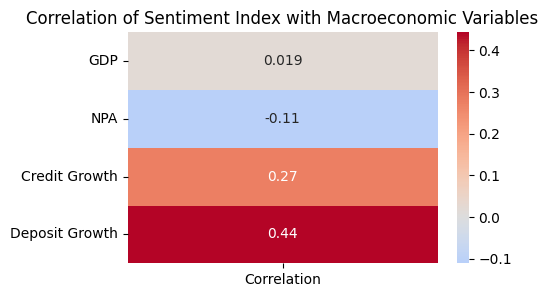

In [16]:
corr_df = sentiment_corr.to_frame(name="Correlation")
plt.figure(figsize=(5,3))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", center=0, cbar=True)
plt.title("Correlation of Sentiment Index with Macroeconomic Variables", fontsize=12)
plt.yticks(rotation=0)
plt.show()

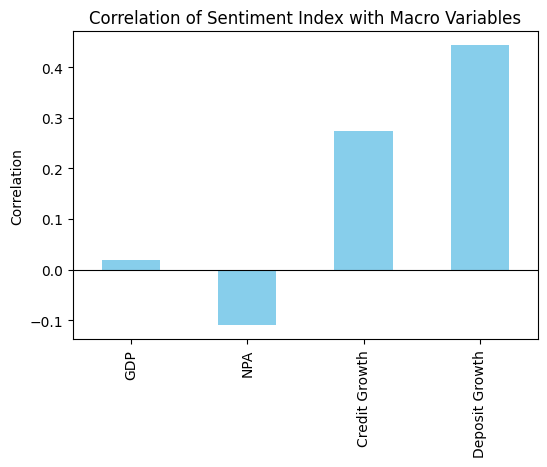

In [17]:
sentiment_corr.plot(kind="bar", color="skyblue", figsize=(6,4))
plt.axhline(0, color="black", linewidth=0.8)
plt.title("Correlation of Sentiment Index with Macro Variables", fontsize=12)
plt.ylabel("Correlation")
plt.show()

In [18]:
X = df_final[["Sentiment Index"]] 
y = df_final[["GDP", "NPA", "Credit Growth", "Deposit Growth"]] 

In [19]:
results = {}
for col in ["GDP", "NPA", "Credit Growth", "Deposit Growth"]:
    y = df_final[col]
    X = sm.add_constant(df_final["Sentiment Index"])
    model = sm.OLS(y, X).fit()
    results[col] = model
    print(f"\nRegression for {col} ~ Sentiment Index")
    print(model.summary())


Regression for GDP ~ Sentiment Index
                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.037
Method:                 Least Squares   F-statistic:                  0.009266
Date:                Fri, 19 Sep 2025   Prob (F-statistic):              0.924
Time:                        21:59:24   Log-Likelihood:                -95.951
No. Observations:                  29   AIC:                             195.9
Df Residuals:                      27   BIC:                             198.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
cons

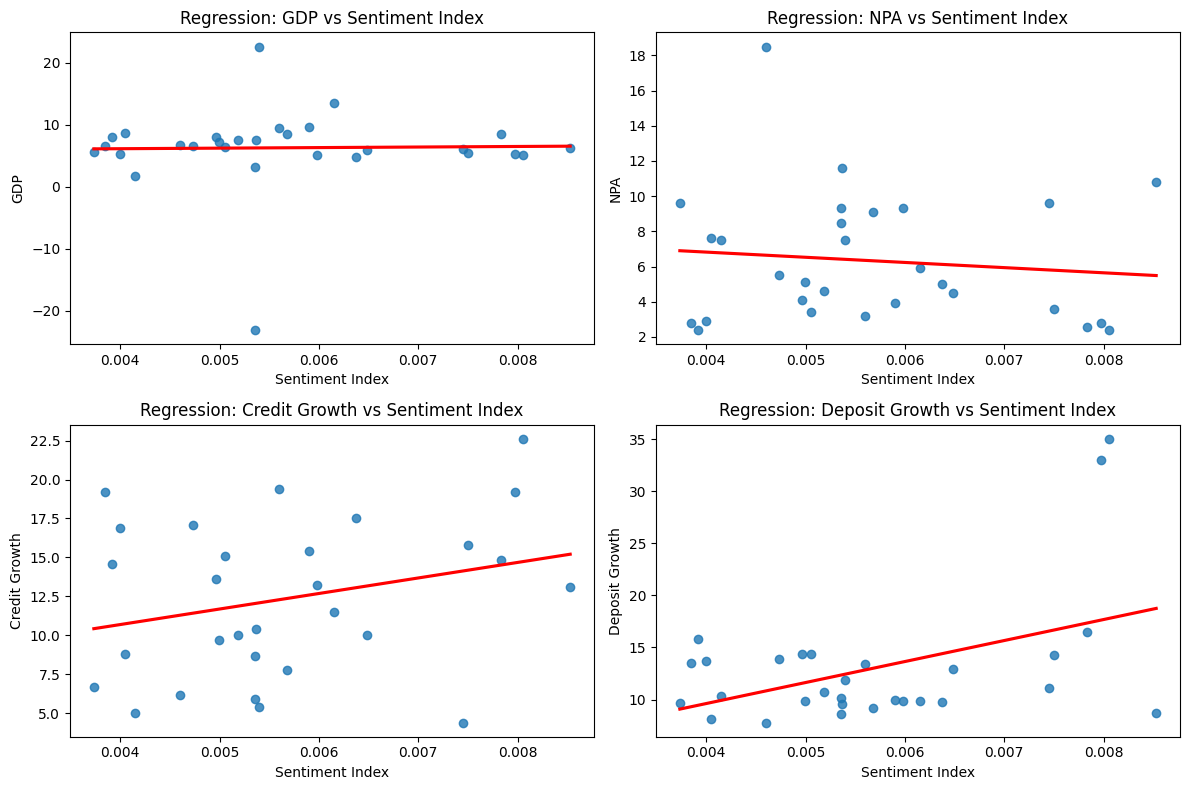

In [20]:
macro_vars = ["GDP", "NPA", "Credit Growth", "Deposit Growth"]
plt.figure(figsize=(12, 8))
for i, col in enumerate(macro_vars, 1):
    plt.subplot(2, 2, i)
    sns.regplot(
        x=df_final["Sentiment Index"],
        y=df_final[col],
        ci=None, line_kws={"color": "red"}
    )
    plt.title(f"Regression: {col} vs Sentiment Index")

plt.tight_layout()
plt.show()


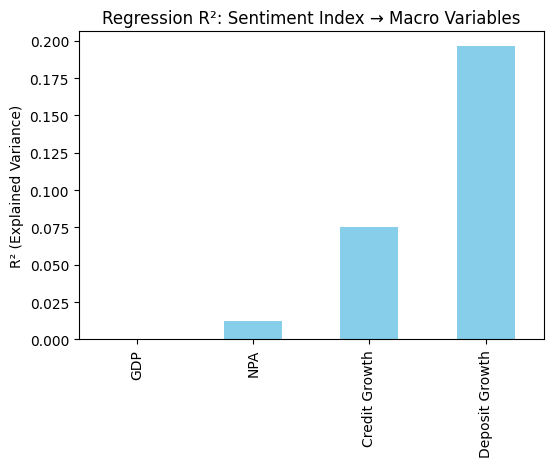

In [21]:
r2_scores = {}
for col in macro_vars:
    X = sm.add_constant(df_final["Sentiment Index"])
    y = df_final[col]
    model = sm.OLS(y, X).fit()
    r2_scores[col] = model.rsquared

r2_df = pd.Series(r2_scores, name="R²")
r2_df.plot(kind="bar", color="skyblue", figsize=(6,4))
plt.title("Regression R²: Sentiment Index → Macro Variables")
plt.ylabel("R² (Explained Variance)")
plt.show()


In [22]:
macro_vars = ["GDP", "NPA", "Credit Growth", "Deposit Growth"]
max_lag = 4
p_values = pd.DataFrame(index=macro_vars, columns=range(1, max_lag+1))

for var in macro_vars:
    test_result = grangercausalitytests(
        df_final[[var, "Sentiment Index"]].dropna(),
        maxlag=max_lag,
        verbose=False
    )
    for lag in range(1, max_lag+1):
        p_values.loc[var, lag] = test_result[lag][0]['ssr_ftest'][1]

p_values = p_values.astype(float)

print("\nGranger Causality p-values: Sentiment Index → Macro Variables\n")
print(p_values)



Granger Causality p-values: Sentiment Index → Macro Variables

                       1         2         3         4
GDP             0.352484  0.754828  0.110681  0.309219
NPA             0.411118  0.802693  0.494875  0.578526
Credit Growth   0.594045  0.589395  0.986333  0.996906
Deposit Growth  0.510870  0.582636  0.052195  0.692617


C:\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


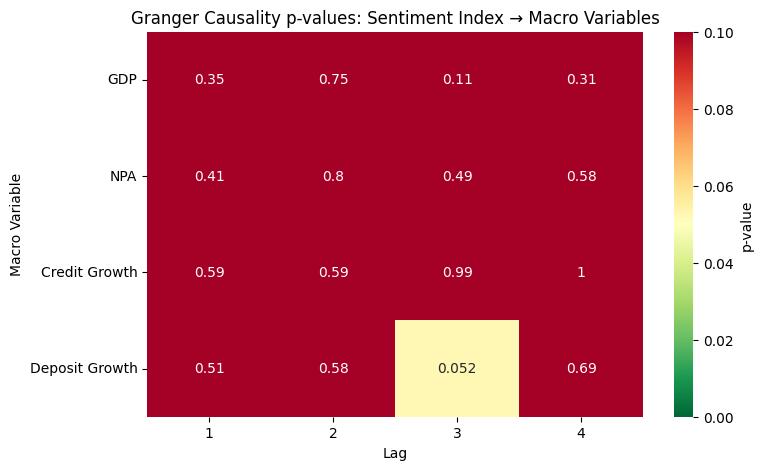

In [23]:
plt.figure(figsize=(8, 5))
sns.heatmap(
    p_values,
    annot=True,
    cmap="RdYlGn_r",  
    cbar_kws={'label': 'p-value'},
    vmin=0, vmax=0.1  
)
plt.title("Granger Causality p-values: Sentiment Index → Macro Variables")
plt.xlabel("Lag")
plt.ylabel("Macro Variable")
plt.show()